In [1]:
import sys
sys.path.append('/home/etaylor/code_projects/DRL/drl_ass3/src')


from actor_critic_agent import ActorCriticAgent
from env_wrapper import EnvironmentWrapper
import gymnasium as gym
import datetime
import numpy as np

In [2]:
# hyperparameters
config = {
    'experiment': 'CartPole',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500

}

In [3]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = EnvironmentWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

In [4]:
results = agent.train(env_wrapper,
    max_episodes=config['max_episodes'],
    max_steps=config['max_steps'],
    reward_threshold=config['reward_threshold'],
    update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 18.0, PLoss: 18.527904510498047, VLoss: 17.70421600341797
Episode 10, Avg Reward: 21.818181818181817, PLoss: 12.23630142211914, VLoss: 15.510093688964844
Episode 20, Avg Reward: 19.333333333333332, PLoss: 8.569491386413574, VLoss: 90.2999038696289
Episode 30, Avg Reward: 20.193548387096776, PLoss: -0.6934747695922852, VLoss: 217.1069793701172
Episode 40, Avg Reward: 18.585365853658537, PLoss: 14.218443870544434, VLoss: 113.63878631591797
Episode 50, Avg Reward: 18.15686274509804, PLoss: -3.305807113647461, VLoss: 22.019344329833984
Episode 60, Avg Reward: 18.19672131147541, PLoss: -4.218690872192383, VLoss: 59.03127670288086
Episode 70, Avg Reward: 18.112676056338028, PLoss: -8.024528503417969, VLoss: 31.79890251159668
Episode 80, Avg Reward: 18.40740740740741, PLoss: -2.5193285942077637, VLoss: 104.6435775756836
Episode 90, Avg Reward: 18.274725274725274, PLoss: 2.538095474243164, VLoss: 291.4744567871094
Episode 100, Avg Reward: 18.27, PLoss: 19.406780242919922

In [ ]:
# Save the models
agent.save_models()

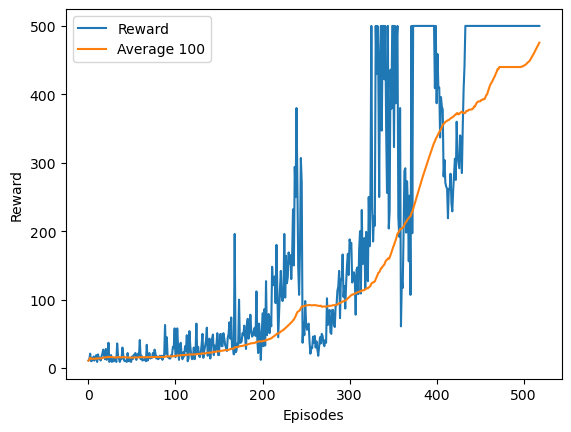

In [6]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()

In [7]:
np.save(f'results/{config["experiment"]}', results)

In [12]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir runs/